In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import nan

In [2]:
data = pd.read_csv("Telecom_customer churn.csv")
# copy_data = data.copy()
y = data['churn']
data = data.drop(['churn', 'Customer_ID'], axis=1)

In [3]:
data

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,A,0.0,N,U,U,U,U,U,Y,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,A,0.0,Z,U,U,U,U,U,Y,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,A,0.0,N,U,Y,U,U,U,Y,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,D,0.0,U,Y,U,U,U,U,Y,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,O,0.0,I,U,U,U,U,U,Y,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,0.0,S,U,U,U,Y,U,Y,773.0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,0.0,N,U,U,Y,Y,Y,Y,835.0
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,U,Y,Y,U,U,U,N,433.0
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,S,U,U,U,U,U,N,75.0


In [4]:
data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.787118,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,1.313977,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,28.000000,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000


In [5]:
def missing_values_table(df):    
        mis_val = df.isnull().sum()        
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        type_column = df.dtypes        
        mis_val_table = pd.concat([mis_val, mis_val_percent, type_column], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'type_column'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
count_missing_values = data.isnull().sum()
count_missing_values

info_about_data = missing_values_table(data)
info_about_data

Your selected dataframe has 98 columns.
There are 43 columns that have missing values.


,Missing Values,% of Total Values,type_column
numbcars,49366,49.4,float64
dwllsize,38308,38.3,object
HHstatin,37923,37.9,object
ownrent,33706,33.7,object
dwlltype,31909,31.9,object
lor,30190,30.2,float64
income,25436,25.4,float64
adults,23019,23.0,float64
infobase,22079,22.1,object
hnd_webcap,10189,10.2,object


In [6]:
# replace value numeric with mean 
for index, row in info_about_data.iterrows():
    if row['type_column'] != "object":        
        #print(row['Missing Values'],index, row['type_column'])
        # calculate mean
        mean_ =  data[index].mean()
        # copy_data[index] = copy_data[index].map({'nan': mean_})
        # copy_data_1[index].fillna(round(mean_))
        #print(copy_data_1[index])
        data[index].fillna(mean_, inplace=True)
        
        # copy_data_1[index].replace(to_replace=dict('NaN'=mean_), inplace=True)

        #print( round(mean_) )
        # replace mean with nan 
        # return 
info_about_data = missing_values_table(data)
info_about_data

Your selected dataframe has 98 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values,type_column
dwllsize,38308,38.3,object
HHstatin,37923,37.9,object
ownrent,33706,33.7,object
dwlltype,31909,31.9,object
infobase,22079,22.1,object
hnd_webcap,10189,10.2,object
prizm_social_one,7388,7.4,object
marital,1732,1.7,object
ethnic,1732,1.7,object
kid0_2,1732,1.7,object


In [7]:
def barplot(x_data, y_data, error_data = "", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    # ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

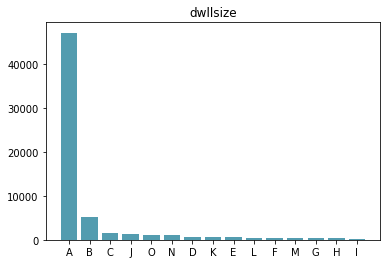

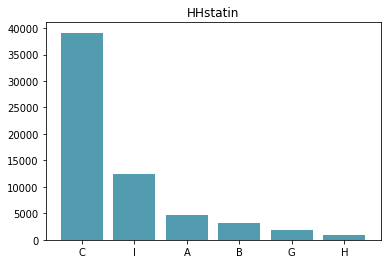

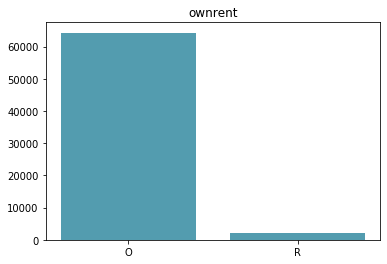

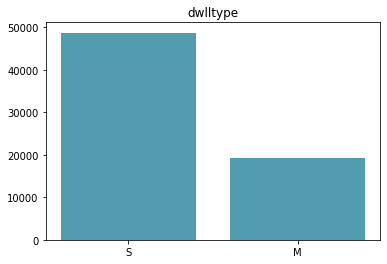

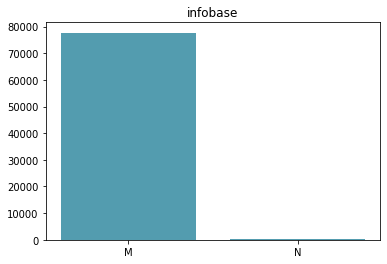

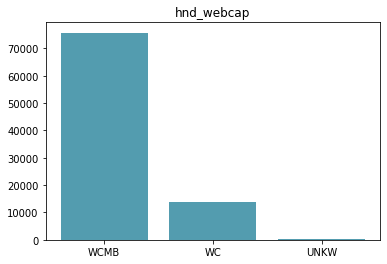

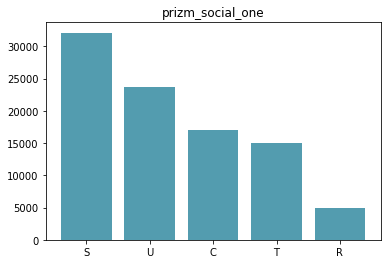

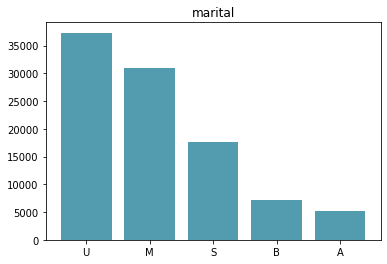

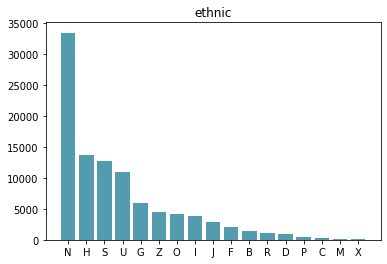

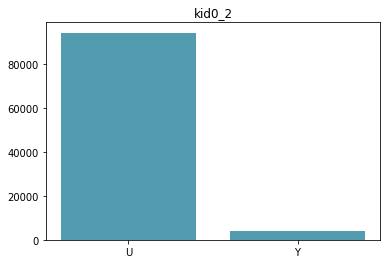

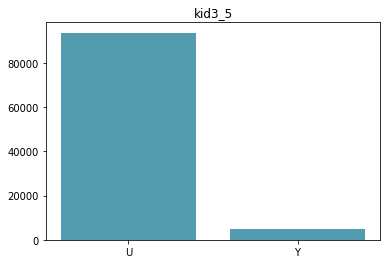

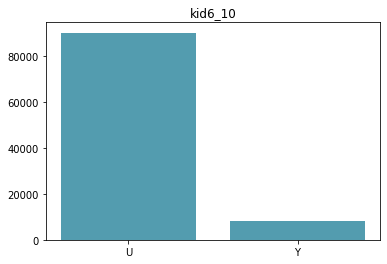

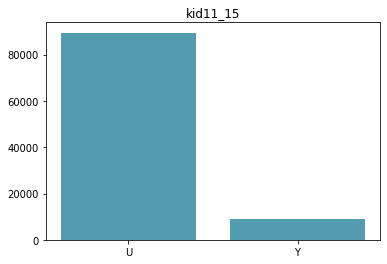

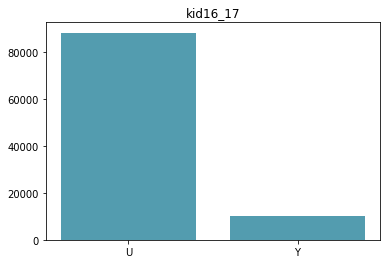

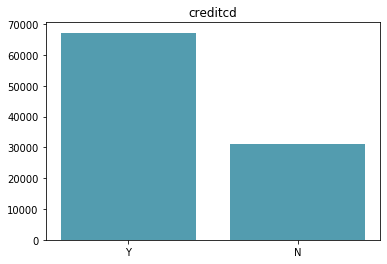

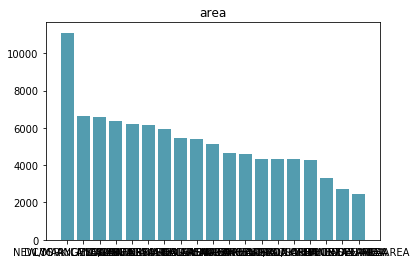

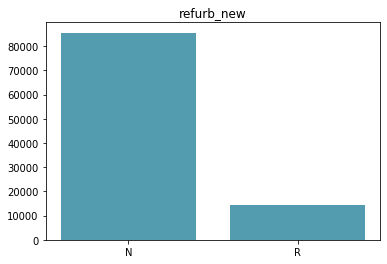

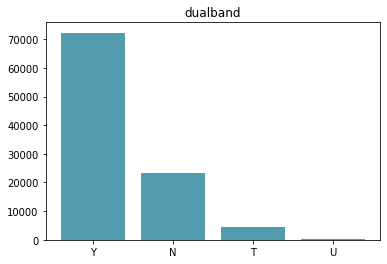

In [8]:


for i, row in info_about_data.iterrows():
    # print(i)
    feature = data[i].value_counts()
    barplot(feature.index, feature.values, x_label="", y_label="", title= i) 

#print(dwllsize.index)
#print(dwllsize.values)


In [40]:
def replace_missing_values(df, column, name_column):

    keys = df.key
    testing_keys = keys.to_numpy('str')
    # print(testing_keys)
    keys = keys.to_frame()    
    
    random_key = random.choice(keys['key'])
    a = 0
    
    for i, value in column.iteritems():

        #if value is np.nan and len(keys.key.value_counts()) > 0:
        if value is np.nan and len(testing_keys) > 0:    
            # random_key = random.choice(keys['key'])
            random_key = random.choice(testing_keys)
            print("Len : ===> ", len(testing_keys))
            print("Random Key : ===> ", random_key)        
            curr_value = df.loc[df['key'] == str(random_key) ]['to_replace'].values[0]
            print("Curr value : ===> ", curr_value)            
            if curr_value > 0:                            
                # random_key = random.choice(keys['key'])
                df.set_value( df.key == random_key, 'to_replace', curr_value - 1)             
                data.set_value( data.index == i, name_column, random_key ) 
                #print("Value set in data : ", data[name_column][i] )
                
            else:            
                # random_key = random.choice(keys['key'])
                # print("before changes ")
                # print(keys)
                # keys = keys[keys.key != random_key]
                index_value = np.where(testing_keys == random_key)
                #print (index_value)
                testing_keys = np.delete(testing_keys, index_value)               
                #print(testing_keys)
                #keys = keys.drop([random_key])
                
                #print(testing_keys)
                # print("Delete Key rest : ===> ", keys)
            # if len(keys.key.value_counts()) > 0:
                
                
            a = a + 1 
            print("A : ===> ", a)
            print('------------------------------')
   
    



for i, row in info_about_data.iterrows():
    
    column = data[row.name].value_counts() 
    info_column = {'key':  column.index,'value': column.values}
    df_info_column = pd.DataFrame(info_column, columns = ['key','value'])

    total_value = data[i].count()
    nb_missing = data.shape[0] - total_value 
    
    percentage = []
    value_to_replace = []
    
    for key, row in df_info_column.iterrows():
        per = round((row['value'] * 100 ) / total_value)
        percentage.append(per)

        to_replace =  round((per * nb_missing) / 100 ) 
        value_to_replace.append(to_replace)

    df_info_column['percentage'] = percentage
    df_info_column['to_replace'] = value_to_replace
    # prizm_social_one,  prizm_social_one, area, marital
    # ethnic 
    if  i == 'hnd_webcap':      
        replace_missing_values(df_info_column,data[i],i)
    #print( row.)
    # test( i )
    #break
    


Len : ===>  3
Random Key : ===>  WC
Curr value : ===>  1528.0
A : ===>  1
------------------------------
Len : ===>  3
Random Key : ===>  WC
Curr value : ===>  1527.0
A : ===>  2
------------------------------
Len : ===>  3
Random Key : ===>  WC
Curr value : ===>  1526.0
A : ===>  3
------------------------------
Len : ===>  3
Random Key : ===>  WC
Curr value : ===>  1525.0
A : ===>  4
------------------------------
Len : ===>  3
Random Key : ===>  WCMB
Curr value : ===>  8559.0
A : ===>  5
------------------------------
Len : ===>  3
Random Key : ===>  UNKW
Curr value : ===>  0.0
A : ===>  6
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8558.0
A : ===>  7
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8557.0
A : ===>  8
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1524.0
A : ===>  9
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : =

/home/galaxy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/galaxy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


A : ===>  37
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1503.0
A : ===>  38
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8548.0
A : ===>  39
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8547.0
A : ===>  40
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1502.0
A : ===>  41
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8546.0
A : ===>  42
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1501.0
A : ===>  43
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1500.0
A : ===>  44
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1499.0
A : ===>  45
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1498.0
A : ===>  46
---------------------------

A : ===>  140
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8498.0
A : ===>  141
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8497.0
A : ===>  142
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8496.0
A : ===>  143
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8495.0
A : ===>  144
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1450.0
A : ===>  145
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8494.0
A : ===>  146
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8493.0
A : ===>  147
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8492.0
A : ===>  148
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8491.0
A : ===>  149
-------

A : ===>  230
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1413.0
A : ===>  231
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1412.0
A : ===>  232
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1411.0
A : ===>  233
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8445.0
A : ===>  234
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8444.0
A : ===>  235
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1410.0
A : ===>  236
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8443.0
A : ===>  237
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1409.0
A : ===>  238
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1408.0
A : ===>  239
-----------------

A : ===>  308
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1376.0
A : ===>  309
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8404.0
A : ===>  310
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8403.0
A : ===>  311
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8402.0
A : ===>  312
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1375.0
A : ===>  313
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8401.0
A : ===>  314
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1374.0
A : ===>  315
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1373.0
A : ===>  316
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1372.0
A : ===>  317
---------------

A : ===>  404
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8360.0
A : ===>  405
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1324.0
A : ===>  406
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8359.0
A : ===>  407
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1323.0
A : ===>  408
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1322.0
A : ===>  409
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8358.0
A : ===>  410
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8357.0
A : ===>  411
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8356.0
A : ===>  412
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1321.0
A : ===>  413
-------------

A : ===>  508
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1282.0
A : ===>  509
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1281.0
A : ===>  510
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8298.0
A : ===>  511
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8297.0
A : ===>  512
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8296.0
A : ===>  513
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1280.0
A : ===>  514
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8295.0
A : ===>  515
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1279.0
A : ===>  516
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8294.0
A : ===>  517
-------------

Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1222.0
A : ===>  618
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8249.0
A : ===>  619
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1221.0
A : ===>  620
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1220.0
A : ===>  621
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8248.0
A : ===>  622
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1219.0
A : ===>  623
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8247.0
A : ===>  624
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1218.0
A : ===>  625
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1217.0
A : ===>  626
------------------------------
Len : ===>  2
Random Key : ===>

A : ===>  719
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1164.0
A : ===>  720
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8205.0
A : ===>  721
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1163.0
A : ===>  722
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1162.0
A : ===>  723
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8204.0
A : ===>  724
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1161.0
A : ===>  725
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8203.0
A : ===>  726
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8202.0
A : ===>  727
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1160.0
A : ===>  728
---------------

A : ===>  824
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8150.0
A : ===>  825
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1114.0
A : ===>  826
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1113.0
A : ===>  827
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8149.0
A : ===>  828
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8148.0
A : ===>  829
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8147.0
A : ===>  830
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1112.0
A : ===>  831
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1111.0
A : ===>  832
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8146.0
A : ===>  833
-------------

A : ===>  928
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1057.0
A : ===>  929
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1056.0
A : ===>  930
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8103.0
A : ===>  931
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1055.0
A : ===>  932
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8102.0
A : ===>  933
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1054.0
A : ===>  934
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1053.0
A : ===>  935
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8101.0
A : ===>  936
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8100.0
A : ===>  937
---------------

A : ===>  1013
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1012.0
A : ===>  1014
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8063.0
A : ===>  1015
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8062.0
A : ===>  1016
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1011.0
A : ===>  1017
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8061.0
A : ===>  1018
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8060.0
A : ===>  1019
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1010.0
A : ===>  1020
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8059.0
A : ===>  1021
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  1009.0
A : ===>  1022
---

A : ===>  1114
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8007.0
A : ===>  1115
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8006.0
A : ===>  1116
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  967.0
A : ===>  1117
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  966.0
A : ===>  1118
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8005.0
A : ===>  1119
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8004.0
A : ===>  1120
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  965.0
A : ===>  1121
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  8003.0
A : ===>  1122
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  964.0
A : ===>  1123
-------

A : ===>  1219
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7954.0
A : ===>  1220
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  915.0
A : ===>  1221
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  914.0
A : ===>  1222
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7953.0
A : ===>  1223
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7952.0
A : ===>  1224
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7951.0
A : ===>  1225
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7950.0
A : ===>  1226
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  913.0
A : ===>  1227
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  912.0
A : ===>  1228
-------

A : ===>  1319
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  861.0
A : ===>  1320
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7908.0
A : ===>  1321
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7907.0
A : ===>  1322
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  860.0
A : ===>  1323
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  859.0
A : ===>  1324
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  858.0
A : ===>  1325
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  857.0
A : ===>  1326
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  856.0
A : ===>  1327
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7906.0
A : ===>  1328
-------------

A : ===>  1413
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7862.0
A : ===>  1414
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7861.0
A : ===>  1415
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7860.0
A : ===>  1416
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  813.0
A : ===>  1417
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7859.0
A : ===>  1418
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  812.0
A : ===>  1419
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  811.0
A : ===>  1420
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  810.0
A : ===>  1421
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  809.0
A : ===>  1422
----------

A : ===>  1492
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7829.0
A : ===>  1493
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  767.0
A : ===>  1494
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7828.0
A : ===>  1495
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7827.0
A : ===>  1496
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7826.0
A : ===>  1497
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  766.0
A : ===>  1498
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  765.0
A : ===>  1499
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  764.0
A : ===>  1500
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7825.0
A : ===>  1501
-------

A : ===>  1587
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7778.0
A : ===>  1588
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  723.0
A : ===>  1589
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  722.0
A : ===>  1590
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7777.0
A : ===>  1591
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  721.0
A : ===>  1592
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  720.0
A : ===>  1593
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  719.0
A : ===>  1594
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  718.0
A : ===>  1595
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7776.0
A : ===>  1596
-------------

A : ===>  1663
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  687.0
A : ===>  1664
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7738.0
A : ===>  1665
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  686.0
A : ===>  1666
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  685.0
A : ===>  1667
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7737.0
A : ===>  1668
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  684.0
A : ===>  1669
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  683.0
A : ===>  1670
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  682.0
A : ===>  1671
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7736.0
A : ===>  1672
-------------

A : ===>  1768
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  630.0
A : ===>  1769
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7690.0
A : ===>  1770
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  629.0
A : ===>  1771
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  628.0
A : ===>  1772
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7689.0
A : ===>  1773
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7688.0
A : ===>  1774
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7687.0
A : ===>  1775
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7686.0
A : ===>  1776
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  627.0
A : ===>  1777
-------

A : ===>  1859
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  585.0
A : ===>  1860
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  584.0
A : ===>  1861
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7644.0
A : ===>  1862
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7643.0
A : ===>  1863
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  583.0
A : ===>  1864
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7642.0
A : ===>  1865
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  582.0
A : ===>  1866
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  581.0
A : ===>  1867
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7641.0
A : ===>  1868
----------

A : ===>  1969
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  529.0
A : ===>  1970
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7590.0
A : ===>  1971
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  528.0
A : ===>  1972
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  527.0
A : ===>  1973
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  526.0
A : ===>  1974
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  525.0
A : ===>  1975
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  524.0
A : ===>  1976
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7589.0
A : ===>  1977
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7588.0
A : ===>  1978
-------------

A : ===>  2075
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  472.0
A : ===>  2076
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  471.0
A : ===>  2077
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  470.0
A : ===>  2078
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7541.0
A : ===>  2079
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7540.0
A : ===>  2080
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7539.0
A : ===>  2081
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  469.0
A : ===>  2082
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7538.0
A : ===>  2083
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  468.0
A : ===>  2084
----------

A : ===>  2176
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7490.0
A : ===>  2177
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7489.0
A : ===>  2178
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  422.0
A : ===>  2179
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  421.0
A : ===>  2180
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  420.0
A : ===>  2181
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  419.0
A : ===>  2182
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7488.0
A : ===>  2183
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  418.0
A : ===>  2184
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  417.0
A : ===>  2185
-------------

A : ===>  2281
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7441.0
A : ===>  2282
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7440.0
A : ===>  2283
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7439.0
A : ===>  2284
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7438.0
A : ===>  2285
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  366.0
A : ===>  2286
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  365.0
A : ===>  2287
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  364.0
A : ===>  2288
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7437.0
A : ===>  2289
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7436.0
A : ===>  2290
----

A : ===>  2379
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  319.0
A : ===>  2380
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  318.0
A : ===>  2381
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  317.0
A : ===>  2382
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  316.0
A : ===>  2383
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7390.0
A : ===>  2384
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7389.0
A : ===>  2385
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  315.0
A : ===>  2386
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7388.0
A : ===>  2387
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7387.0
A : ===>  2388
----------

A : ===>  2482
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  263.0
A : ===>  2483
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  262.0
A : ===>  2484
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  261.0
A : ===>  2485
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7343.0
A : ===>  2486
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7342.0
A : ===>  2487
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7341.0
A : ===>  2488
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  260.0
A : ===>  2489
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7340.0
A : ===>  2490
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7339.0
A : ===>  2491
-------

A : ===>  2589
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7289.0
A : ===>  2590
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7288.0
A : ===>  2591
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  210.0
A : ===>  2592
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7287.0
A : ===>  2593
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  209.0
A : ===>  2594
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7286.0
A : ===>  2595
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7285.0
A : ===>  2596
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  208.0
A : ===>  2597
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7284.0
A : ===>  2598
----

A : ===>  2674
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  173.0
A : ===>  2675
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7241.0
A : ===>  2676
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  172.0
A : ===>  2677
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7240.0
A : ===>  2678
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7239.0
A : ===>  2679
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  171.0
A : ===>  2680
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7238.0
A : ===>  2681
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  170.0
A : ===>  2682
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7237.0
A : ===>  2683
-------

A : ===>  2770
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  121.0
A : ===>  2771
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  120.0
A : ===>  2772
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  119.0
A : ===>  2773
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  118.0
A : ===>  2774
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  117.0
A : ===>  2775
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  116.0
A : ===>  2776
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  115.0
A : ===>  2777
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7197.0
A : ===>  2778
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7196.0
A : ===>  2779
----------------

A : ===>  2873
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  67.0
A : ===>  2874
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  66.0
A : ===>  2875
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7148.0
A : ===>  2876
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7147.0
A : ===>  2877
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7146.0
A : ===>  2878
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7145.0
A : ===>  2879
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7144.0
A : ===>  2880
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  65.0
A : ===>  2881
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7143.0
A : ===>  2882
-------

Random Key : ===>  WCMB
Curr value : ===>  7097.0
A : ===>  2976
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7096.0
A : ===>  2977
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  16.0
A : ===>  2978
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7095.0
A : ===>  2979
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  15.0
A : ===>  2980
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  14.0
A : ===>  2981
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7094.0
A : ===>  2982
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Curr value : ===>  7093.0
A : ===>  2983
------------------------------
Len : ===>  2
Random Key : ===>  WC
Curr value : ===>  13.0
A : ===>  2984
------------------------------
Len : ===>  2
Random Key : ===>  WCMB
Cu

Random Key : ===>  WCMB
Curr value : ===>  7006.0
A : ===>  3084
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  7005.0
A : ===>  3085
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  7004.0
A : ===>  3086
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  7003.0
A : ===>  3087
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  7002.0
A : ===>  3088
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  7001.0
A : ===>  3089
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  7000.0
A : ===>  3090
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6999.0
A : ===>  3091
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6998.0
A : ===>  3092
------------------------------
Len : ===>  1
Random Key

Random Key : ===>  WCMB
Curr value : ===>  6899.0
A : ===>  3191
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6898.0
A : ===>  3192
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6897.0
A : ===>  3193
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6896.0
A : ===>  3194
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6895.0
A : ===>  3195
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6894.0
A : ===>  3196
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6893.0
A : ===>  3197
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6892.0
A : ===>  3198
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6891.0
A : ===>  3199
------------------------------
Len : ===>  1
Random Key

A : ===>  3300
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6789.0
A : ===>  3301
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6788.0
A : ===>  3302
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6787.0
A : ===>  3303
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6786.0
A : ===>  3304
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6785.0
A : ===>  3305
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6784.0
A : ===>  3306
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6783.0
A : ===>  3307
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6782.0
A : ===>  3308
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6781.0
A : ===>  

A : ===>  3408
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6681.0
A : ===>  3409
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6680.0
A : ===>  3410
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6679.0
A : ===>  3411
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6678.0
A : ===>  3412
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6677.0
A : ===>  3413
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6676.0
A : ===>  3414
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6675.0
A : ===>  3415
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6674.0
A : ===>  3416
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6673.0
A : ===>  

A : ===>  3514
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6575.0
A : ===>  3515
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6574.0
A : ===>  3516
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6573.0
A : ===>  3517
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6572.0
A : ===>  3518
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6571.0
A : ===>  3519
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6570.0
A : ===>  3520
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6569.0
A : ===>  3521
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6568.0
A : ===>  3522
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6567.0
A : ===>  

A : ===>  3623
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6466.0
A : ===>  3624
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6465.0
A : ===>  3625
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6464.0
A : ===>  3626
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6463.0
A : ===>  3627
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6462.0
A : ===>  3628
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6461.0
A : ===>  3629
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6460.0
A : ===>  3630
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6459.0
A : ===>  3631
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6458.0
A : ===>  

A : ===>  3730
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6359.0
A : ===>  3731
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6358.0
A : ===>  3732
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6357.0
A : ===>  3733
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6356.0
A : ===>  3734
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6355.0
A : ===>  3735
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6354.0
A : ===>  3736
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6353.0
A : ===>  3737
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6352.0
A : ===>  3738
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6351.0
A : ===>  

A : ===>  3835
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6254.0
A : ===>  3836
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6253.0
A : ===>  3837
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6252.0
A : ===>  3838
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6251.0
A : ===>  3839
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6250.0
A : ===>  3840
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6249.0
A : ===>  3841
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6248.0
A : ===>  3842
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6247.0
A : ===>  3843
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6246.0
A : ===>  

A : ===>  3936
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6153.0
A : ===>  3937
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6152.0
A : ===>  3938
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6151.0
A : ===>  3939
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6150.0
A : ===>  3940
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6149.0
A : ===>  3941
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6148.0
A : ===>  3942
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6147.0
A : ===>  3943
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6146.0
A : ===>  3944
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6145.0
A : ===>  

Curr value : ===>  6047.0
A : ===>  4043
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6046.0
A : ===>  4044
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6045.0
A : ===>  4045
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6044.0
A : ===>  4046
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6043.0
A : ===>  4047
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6042.0
A : ===>  4048
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6041.0
A : ===>  4049
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6040.0
A : ===>  4050
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6039.0
A : ===>  4051
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value

A : ===>  4150
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5939.0
A : ===>  4151
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5938.0
A : ===>  4152
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5937.0
A : ===>  4153
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5936.0
A : ===>  4154
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5935.0
A : ===>  4155
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5934.0
A : ===>  4156
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5933.0
A : ===>  4157
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5932.0
A : ===>  4158
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5931.0
A : ===>  

A : ===>  4256
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5833.0
A : ===>  4257
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5832.0
A : ===>  4258
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5831.0
A : ===>  4259
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5830.0
A : ===>  4260
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5829.0
A : ===>  4261
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5828.0
A : ===>  4262
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5827.0
A : ===>  4263
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5826.0
A : ===>  4264
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5825.0
A : ===>  

A : ===>  4364
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5725.0
A : ===>  4365
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5724.0
A : ===>  4366
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5723.0
A : ===>  4367
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5722.0
A : ===>  4368
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5721.0
A : ===>  4369
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5720.0
A : ===>  4370
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5719.0
A : ===>  4371
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5718.0
A : ===>  4372
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5717.0
A : ===>  

A : ===>  4471
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5618.0
A : ===>  4472
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5617.0
A : ===>  4473
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5616.0
A : ===>  4474
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5615.0
A : ===>  4475
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5614.0
A : ===>  4476
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5613.0
A : ===>  4477
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5612.0
A : ===>  4478
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5611.0
A : ===>  4479
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5610.0
A : ===>  

A : ===>  4577
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5512.0
A : ===>  4578
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5511.0
A : ===>  4579
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5510.0
A : ===>  4580
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5509.0
A : ===>  4581
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5508.0
A : ===>  4582
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5507.0
A : ===>  4583
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5506.0
A : ===>  4584
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5505.0
A : ===>  4585
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5504.0
A : ===>  

A : ===>  4682
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5407.0
A : ===>  4683
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5406.0
A : ===>  4684
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5405.0
A : ===>  4685
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5404.0
A : ===>  4686
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5403.0
A : ===>  4687
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5402.0
A : ===>  4688
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5401.0
A : ===>  4689
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5400.0
A : ===>  4690
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5399.0
A : ===>  

A : ===>  4788
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5301.0
A : ===>  4789
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5300.0
A : ===>  4790
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5299.0
A : ===>  4791
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5298.0
A : ===>  4792
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5297.0
A : ===>  4793
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5296.0
A : ===>  4794
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5295.0
A : ===>  4795
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5294.0
A : ===>  4796
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5293.0
A : ===>  

A : ===>  4891
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5198.0
A : ===>  4892
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5197.0
A : ===>  4893
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5196.0
A : ===>  4894
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5195.0
A : ===>  4895
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5194.0
A : ===>  4896
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5193.0
A : ===>  4897
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5192.0
A : ===>  4898
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5191.0
A : ===>  4899
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5190.0
A : ===>  

A : ===>  4994
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5095.0
A : ===>  4995
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5094.0
A : ===>  4996
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5093.0
A : ===>  4997
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5092.0
A : ===>  4998
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5091.0
A : ===>  4999
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5090.0
A : ===>  5000
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5089.0
A : ===>  5001
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5088.0
A : ===>  5002
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5087.0
A : ===>  

A : ===>  5100
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4989.0
A : ===>  5101
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4988.0
A : ===>  5102
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4987.0
A : ===>  5103
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4986.0
A : ===>  5104
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4985.0
A : ===>  5105
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4984.0
A : ===>  5106
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4983.0
A : ===>  5107
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4982.0
A : ===>  5108
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4981.0
A : ===>  

A : ===>  5201
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4888.0
A : ===>  5202
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4887.0
A : ===>  5203
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4886.0
A : ===>  5204
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4885.0
A : ===>  5205
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4884.0
A : ===>  5206
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4883.0
A : ===>  5207
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4882.0
A : ===>  5208
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4881.0
A : ===>  5209
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4880.0
A : ===>  

A : ===>  5287
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4802.0
A : ===>  5288
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4801.0
A : ===>  5289
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4800.0
A : ===>  5290
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4799.0
A : ===>  5291
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4798.0
A : ===>  5292
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4797.0
A : ===>  5293
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4796.0
A : ===>  5294
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4795.0
A : ===>  5295
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4794.0
A : ===>  

A : ===>  5381
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4708.0
A : ===>  5382
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4707.0
A : ===>  5383
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4706.0
A : ===>  5384
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4705.0
A : ===>  5385
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4704.0
A : ===>  5386
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4703.0
A : ===>  5387
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4702.0
A : ===>  5388
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4701.0
A : ===>  5389
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4700.0
A : ===>  

A : ===>  5484
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4605.0
A : ===>  5485
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4604.0
A : ===>  5486
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4603.0
A : ===>  5487
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4602.0
A : ===>  5488
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4601.0
A : ===>  5489
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4600.0
A : ===>  5490
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4599.0
A : ===>  5491
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4598.0
A : ===>  5492
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4597.0
A : ===>  

A : ===>  5592
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4497.0
A : ===>  5593
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4496.0
A : ===>  5594
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4495.0
A : ===>  5595
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4494.0
A : ===>  5596
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4493.0
A : ===>  5597
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4492.0
A : ===>  5598
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4491.0
A : ===>  5599
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4490.0
A : ===>  5600
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4489.0
A : ===>  

A : ===>  5700
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4389.0
A : ===>  5701
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4388.0
A : ===>  5702
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4387.0
A : ===>  5703
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4386.0
A : ===>  5704
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4385.0
A : ===>  5705
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4384.0
A : ===>  5706
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4383.0
A : ===>  5707
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4382.0
A : ===>  5708
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4381.0
A : ===>  

A : ===>  5807
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4282.0
A : ===>  5808
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4281.0
A : ===>  5809
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4280.0
A : ===>  5810
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4279.0
A : ===>  5811
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4278.0
A : ===>  5812
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4277.0
A : ===>  5813
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4276.0
A : ===>  5814
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4275.0
A : ===>  5815
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4274.0
A : ===>  

A : ===>  5909
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4180.0
A : ===>  5910
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4179.0
A : ===>  5911
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4178.0
A : ===>  5912
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4177.0
A : ===>  5913
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4176.0
A : ===>  5914
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4175.0
A : ===>  5915
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4174.0
A : ===>  5916
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4173.0
A : ===>  5917
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4172.0
A : ===>  

A : ===>  6010
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4079.0
A : ===>  6011
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4078.0
A : ===>  6012
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4077.0
A : ===>  6013
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4076.0
A : ===>  6014
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4075.0
A : ===>  6015
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4074.0
A : ===>  6016
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4073.0
A : ===>  6017
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4072.0
A : ===>  6018
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4071.0
A : ===>  

A : ===>  6116
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3973.0
A : ===>  6117
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3972.0
A : ===>  6118
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3971.0
A : ===>  6119
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3970.0
A : ===>  6120
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3969.0
A : ===>  6121
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3968.0
A : ===>  6122
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3967.0
A : ===>  6123
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3966.0
A : ===>  6124
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3965.0
A : ===>  

A : ===>  6219
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3870.0
A : ===>  6220
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3869.0
A : ===>  6221
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3868.0
A : ===>  6222
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3867.0
A : ===>  6223
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3866.0
A : ===>  6224
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3865.0
A : ===>  6225
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3864.0
A : ===>  6226
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3863.0
A : ===>  6227
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3862.0
A : ===>  

A : ===>  6323
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3766.0
A : ===>  6324
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3765.0
A : ===>  6325
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3764.0
A : ===>  6326
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3763.0
A : ===>  6327
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3762.0
A : ===>  6328
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3761.0
A : ===>  6329
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3760.0
A : ===>  6330
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3759.0
A : ===>  6331
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3758.0
A : ===>  

Random Key : ===>  WCMB
Curr value : ===>  3662.0
A : ===>  6428
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3661.0
A : ===>  6429
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3660.0
A : ===>  6430
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3659.0
A : ===>  6431
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3658.0
A : ===>  6432
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3657.0
A : ===>  6433
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3656.0
A : ===>  6434
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3655.0
A : ===>  6435
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3654.0
A : ===>  6436
------------------------------
Len : ===>  1
Random Key

A : ===>  6529
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3560.0
A : ===>  6530
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3559.0
A : ===>  6531
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3558.0
A : ===>  6532
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3557.0
A : ===>  6533
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3556.0
A : ===>  6534
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3555.0
A : ===>  6535
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3554.0
A : ===>  6536
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3553.0
A : ===>  6537
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3552.0
A : ===>  

A : ===>  6614
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3475.0
A : ===>  6615
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3474.0
A : ===>  6616
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3473.0
A : ===>  6617
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3472.0
A : ===>  6618
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3471.0
A : ===>  6619
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3470.0
A : ===>  6620
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3469.0
A : ===>  6621
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3468.0
A : ===>  6622
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3467.0
A : ===>  

A : ===>  6702
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3387.0
A : ===>  6703
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3386.0
A : ===>  6704
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3385.0
A : ===>  6705
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3384.0
A : ===>  6706
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3383.0
A : ===>  6707
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3382.0
A : ===>  6708
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3381.0
A : ===>  6709
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3380.0
A : ===>  6710
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3379.0
A : ===>  

A : ===>  6807
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3282.0
A : ===>  6808
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3281.0
A : ===>  6809
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3280.0
A : ===>  6810
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3279.0
A : ===>  6811
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3278.0
A : ===>  6812
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3277.0
A : ===>  6813
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3276.0
A : ===>  6814
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3275.0
A : ===>  6815
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3274.0
A : ===>  

A : ===>  6916
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3173.0
A : ===>  6917
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3172.0
A : ===>  6918
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3171.0
A : ===>  6919
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3170.0
A : ===>  6920
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3169.0
A : ===>  6921
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3168.0
A : ===>  6922
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3167.0
A : ===>  6923
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3166.0
A : ===>  6924
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3165.0
A : ===>  

A : ===>  7023
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3066.0
A : ===>  7024
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3065.0
A : ===>  7025
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3064.0
A : ===>  7026
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3063.0
A : ===>  7027
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3062.0
A : ===>  7028
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3061.0
A : ===>  7029
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3060.0
A : ===>  7030
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3059.0
A : ===>  7031
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3058.0
A : ===>  

A : ===>  7130
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2959.0
A : ===>  7131
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2958.0
A : ===>  7132
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2957.0
A : ===>  7133
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2956.0
A : ===>  7134
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2955.0
A : ===>  7135
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2954.0
A : ===>  7136
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2953.0
A : ===>  7137
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2952.0
A : ===>  7138
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2951.0
A : ===>  

A : ===>  7236
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2853.0
A : ===>  7237
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2852.0
A : ===>  7238
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2851.0
A : ===>  7239
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2850.0
A : ===>  7240
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2849.0
A : ===>  7241
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2848.0
A : ===>  7242
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2847.0
A : ===>  7243
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2846.0
A : ===>  7244
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2845.0
A : ===>  

A : ===>  7327
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2762.0
A : ===>  7328
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2761.0
A : ===>  7329
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2760.0
A : ===>  7330
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2759.0
A : ===>  7331
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2758.0
A : ===>  7332
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2757.0
A : ===>  7333
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2756.0
A : ===>  7334
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2755.0
A : ===>  7335
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2754.0
A : ===>  

A : ===>  7414
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2675.0
A : ===>  7415
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2674.0
A : ===>  7416
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2673.0
A : ===>  7417
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2672.0
A : ===>  7418
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2671.0
A : ===>  7419
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2670.0
A : ===>  7420
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2669.0
A : ===>  7421
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2668.0
A : ===>  7422
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2667.0
A : ===>  

A : ===>  7494
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2595.0
A : ===>  7495
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2594.0
A : ===>  7496
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2593.0
A : ===>  7497
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2592.0
A : ===>  7498
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2591.0
A : ===>  7499
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2590.0
A : ===>  7500
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2589.0
A : ===>  7501
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2588.0
A : ===>  7502
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2587.0
A : ===>  

A : ===>  7591
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2498.0
A : ===>  7592
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2497.0
A : ===>  7593
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2496.0
A : ===>  7594
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2495.0
A : ===>  7595
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2494.0
A : ===>  7596
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2493.0
A : ===>  7597
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2492.0
A : ===>  7598
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2491.0
A : ===>  7599
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2490.0
A : ===>  

A : ===>  7683
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2406.0
A : ===>  7684
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2405.0
A : ===>  7685
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2404.0
A : ===>  7686
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2403.0
A : ===>  7687
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2402.0
A : ===>  7688
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2401.0
A : ===>  7689
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2400.0
A : ===>  7690
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2399.0
A : ===>  7691
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2398.0
A : ===>  

A : ===>  7788
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2301.0
A : ===>  7789
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2300.0
A : ===>  7790
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2299.0
A : ===>  7791
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2298.0
A : ===>  7792
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2297.0
A : ===>  7793
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2296.0
A : ===>  7794
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2295.0
A : ===>  7795
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2294.0
A : ===>  7796
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2293.0
A : ===>  

A : ===>  7873
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2216.0
A : ===>  7874
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2215.0
A : ===>  7875
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2214.0
A : ===>  7876
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2213.0
A : ===>  7877
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2212.0
A : ===>  7878
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2211.0
A : ===>  7879
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2210.0
A : ===>  7880
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2209.0
A : ===>  7881
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2208.0
A : ===>  

A : ===>  7951
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2138.0
A : ===>  7952
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2137.0
A : ===>  7953
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2136.0
A : ===>  7954
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2135.0
A : ===>  7955
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2134.0
A : ===>  7956
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2133.0
A : ===>  7957
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2132.0
A : ===>  7958
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2131.0
A : ===>  7959
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2130.0
A : ===>  

A : ===>  8049
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2040.0
A : ===>  8050
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2039.0
A : ===>  8051
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2038.0
A : ===>  8052
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2037.0
A : ===>  8053
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2036.0
A : ===>  8054
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2035.0
A : ===>  8055
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2034.0
A : ===>  8056
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2033.0
A : ===>  8057
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2032.0
A : ===>  

Curr value : ===>  1941.0
A : ===>  8149
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1940.0
A : ===>  8150
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1939.0
A : ===>  8151
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1938.0
A : ===>  8152
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1937.0
A : ===>  8153
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1936.0
A : ===>  8154
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1935.0
A : ===>  8155
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1934.0
A : ===>  8156
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1933.0
A : ===>  8157
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value

A : ===>  8252
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1837.0
A : ===>  8253
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1836.0
A : ===>  8254
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1835.0
A : ===>  8255
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1834.0
A : ===>  8256
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1833.0
A : ===>  8257
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1832.0
A : ===>  8258
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1831.0
A : ===>  8259
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1830.0
A : ===>  8260
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1829.0
A : ===>  

A : ===>  8356
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1733.0
A : ===>  8357
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1732.0
A : ===>  8358
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1731.0
A : ===>  8359
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1730.0
A : ===>  8360
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1729.0
A : ===>  8361
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1728.0
A : ===>  8362
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1727.0
A : ===>  8363
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1726.0
A : ===>  8364
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1725.0
A : ===>  

A : ===>  8452
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1637.0
A : ===>  8453
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1636.0
A : ===>  8454
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1635.0
A : ===>  8455
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1634.0
A : ===>  8456
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1633.0
A : ===>  8457
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1632.0
A : ===>  8458
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1631.0
A : ===>  8459
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1630.0
A : ===>  8460
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1629.0
A : ===>  

A : ===>  8554
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1535.0
A : ===>  8555
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1534.0
A : ===>  8556
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1533.0
A : ===>  8557
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1532.0
A : ===>  8558
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1531.0
A : ===>  8559
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1530.0
A : ===>  8560
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1529.0
A : ===>  8561
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1528.0
A : ===>  8562
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1527.0
A : ===>  

A : ===>  8657
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1432.0
A : ===>  8658
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1431.0
A : ===>  8659
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1430.0
A : ===>  8660
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1429.0
A : ===>  8661
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1428.0
A : ===>  8662
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1427.0
A : ===>  8663
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1426.0
A : ===>  8664
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1425.0
A : ===>  8665
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1424.0
A : ===>  

A : ===>  8750
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1339.0
A : ===>  8751
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1338.0
A : ===>  8752
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1337.0
A : ===>  8753
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1336.0
A : ===>  8754
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1335.0
A : ===>  8755
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1334.0
A : ===>  8756
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1333.0
A : ===>  8757
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1332.0
A : ===>  8758
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1331.0
A : ===>  

A : ===>  8839
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1250.0
A : ===>  8840
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1249.0
A : ===>  8841
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1248.0
A : ===>  8842
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1247.0
A : ===>  8843
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1246.0
A : ===>  8844
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1245.0
A : ===>  8845
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1244.0
A : ===>  8846
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1243.0
A : ===>  8847
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1242.0
A : ===>  

A : ===>  8927
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1162.0
A : ===>  8928
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1161.0
A : ===>  8929
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1160.0
A : ===>  8930
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1159.0
A : ===>  8931
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1158.0
A : ===>  8932
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1157.0
A : ===>  8933
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1156.0
A : ===>  8934
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1155.0
A : ===>  8935
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1154.0
A : ===>  

Curr value : ===>  1075.0
A : ===>  9015
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1074.0
A : ===>  9016
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1073.0
A : ===>  9017
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1072.0
A : ===>  9018
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1071.0
A : ===>  9019
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1070.0
A : ===>  9020
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1069.0
A : ===>  9021
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1068.0
A : ===>  9022
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1067.0
A : ===>  9023
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value

A : ===>  9095
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  994.0
A : ===>  9096
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  993.0
A : ===>  9097
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  992.0
A : ===>  9098
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  991.0
A : ===>  9099
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  990.0
A : ===>  9100
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  989.0
A : ===>  9101
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  988.0
A : ===>  9102
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  987.0
A : ===>  9103
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  986.0
A : ===>  9104
----

A : ===>  9179
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  910.0
A : ===>  9180
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  909.0
A : ===>  9181
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  908.0
A : ===>  9182
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  907.0
A : ===>  9183
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  906.0
A : ===>  9184
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  905.0
A : ===>  9185
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  904.0
A : ===>  9186
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  903.0
A : ===>  9187
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  902.0
A : ===>  9188
----

A : ===>  9272
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  817.0
A : ===>  9273
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  816.0
A : ===>  9274
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  815.0
A : ===>  9275
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  814.0
A : ===>  9276
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  813.0
A : ===>  9277
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  812.0
A : ===>  9278
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  811.0
A : ===>  9279
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  810.0
A : ===>  9280
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  809.0
A : ===>  9281
----

A : ===>  9350
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  739.0
A : ===>  9351
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  738.0
A : ===>  9352
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  737.0
A : ===>  9353
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  736.0
A : ===>  9354
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  735.0
A : ===>  9355
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  734.0
A : ===>  9356
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  733.0
A : ===>  9357
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  732.0
A : ===>  9358
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  731.0
A : ===>  9359
----

A : ===>  9428
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  661.0
A : ===>  9429
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  660.0
A : ===>  9430
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  659.0
A : ===>  9431
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  658.0
A : ===>  9432
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  657.0
A : ===>  9433
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  656.0
A : ===>  9434
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  655.0
A : ===>  9435
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  654.0
A : ===>  9436
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  653.0
A : ===>  9437
----

A : ===>  9519
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  570.0
A : ===>  9520
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  569.0
A : ===>  9521
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  568.0
A : ===>  9522
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  567.0
A : ===>  9523
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  566.0
A : ===>  9524
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  565.0
A : ===>  9525
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  564.0
A : ===>  9526
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  563.0
A : ===>  9527
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  562.0
A : ===>  9528
----

A : ===>  9609
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  480.0
A : ===>  9610
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  479.0
A : ===>  9611
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  478.0
A : ===>  9612
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  477.0
A : ===>  9613
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  476.0
A : ===>  9614
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  475.0
A : ===>  9615
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  474.0
A : ===>  9616
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  473.0
A : ===>  9617
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  472.0
A : ===>  9618
----

A : ===>  9694
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  395.0
A : ===>  9695
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  394.0
A : ===>  9696
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  393.0
A : ===>  9697
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  392.0
A : ===>  9698
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  391.0
A : ===>  9699
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  390.0
A : ===>  9700
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  389.0
A : ===>  9701
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  388.0
A : ===>  9702
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  387.0
A : ===>  9703
----

A : ===>  9784
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  305.0
A : ===>  9785
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  304.0
A : ===>  9786
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  303.0
A : ===>  9787
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  302.0
A : ===>  9788
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  301.0
A : ===>  9789
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  300.0
A : ===>  9790
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  299.0
A : ===>  9791
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  298.0
A : ===>  9792
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  297.0
A : ===>  9793
----

A : ===>  9887
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  202.0
A : ===>  9888
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  201.0
A : ===>  9889
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  200.0
A : ===>  9890
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  199.0
A : ===>  9891
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  198.0
A : ===>  9892
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  197.0
A : ===>  9893
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  196.0
A : ===>  9894
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  195.0
A : ===>  9895
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  194.0
A : ===>  9896
----

A : ===>  9983
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  106.0
A : ===>  9984
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  105.0
A : ===>  9985
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  104.0
A : ===>  9986
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  103.0
A : ===>  9987
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  102.0
A : ===>  9988
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  101.0
A : ===>  9989
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  100.0
A : ===>  9990
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  99.0
A : ===>  9991
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  98.0
A : ===>  9992
------

Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  6.0
A : ===>  10084
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  5.0
A : ===>  10085
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  4.0
A : ===>  10086
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  3.0
A : ===>  10087
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  2.0
A : ===>  10088
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  1.0
A : ===>  10089
------------------------------
Len : ===>  1
Random Key : ===>  WCMB
Curr value : ===>  0.0
A : ===>  10090
------------------------------


In [23]:
print(data.marital.isnull().sum())

4


In [42]:
missing_values_table(data)
data.to_csv('testing_19_2020.csv')

Your selected dataframe has 98 columns.
There are 15 columns that have missing values.
